# Digital Signal Processing

## What is Digital Signal Processing?

This chapter provides a quick overview of digital signal processing DSP . DSP is inherent part of many measurement system and at least post processing of data before actual analysis and is therefore included in this course.

#### Signal processing
The purpose of signal processing is to improve the quality of a signal by suppressing noise. It can also be used to get rid off redundant information to store and transmit data more efficiently.

SciPy has extensive DSP functionality in scipy.signal namespace.
- DSP deals with digital signals on computers.
- Analog signal processing is implemented using components: resistors, capacitors, inductors.
- Digital filters are more accurate and cheaper than analog ones and don’t suffer from aging.

## Filter types
Filtering aims to remove unwanted noise from a signal or separate several sources from one measured signal.
- **Lowpass filter** is used to remove high frequencies.
- **Highpass filter** is used to remove low frequencies.
- **Bandpass filter** is used to remove low and high frequencies.
- **Bandreject filter** is used to remove a certain frequency band between low and high frequencies.
 
#### Ideal filters

Filters are not perfect so in practice filtered data also contains filtered frequencies, but they are greatly attenuated.

## Filter properties
#### Choosing the correct filter

Filters can be optimized for either time domain or frequency domain performance, but it is not possible to optimize a filter for both applications.

- **Time domain** performance of the filter is measured with step response and phase response.
- **Frequency domain** performance is measured with amplitude response.
- Step and Amplitude response can be calculated from impulse response.

The frequency response of a filter can be obtained from its impulse response by Fourier transforming it and the step response is the cumulative sum of the impulse response. 

#### Filtering causes distortion

Every filter causes some amount of distortion to filtered signal. It is important to be aware of the properties of the filter you use.

![f_properties.png](f_properties.png)
<center><b> Figure 1 : Filter terminology for step and amplitude response. 100th order Blackman FIR lowpass filter.</center></b>

The properties of a filter are characterized by the following concepts and Figure 1

- **Amplitude response** is the ratio between input and output signals. The aim is to get a sharp attenuation and no ripple on - passband ( Figure 1 a). It is sometimes also called the frequency response.
- **Phase response** is the change in the phase of the input signal after filtering.
- **Linear phase** filters have the same phase shift for all frequencies.
- **Zero phase** filters have no phase shift.
- **Impulse response** is the filters output when the input is a unit signal.
- **Step response** is the filters output when the input is a step signal. Good step response is sharp and doesn’t overshoot.

## Filter properties using SciPy

SciPy filter design and analysis code is in `scipy.signal` namespace. There are several function to design and analyze filters.

However SciPy doesn’t have good functions for plotting amplitude response or phase response. So here are two useful functions that can be used to plot filter properties. You’ll need to import `scipy.signal` in order to use them.

In [1]:
%pylab inline
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing

## Frequency response

In [30]:
def plot_freqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    plt.plot(w/np.pi, h_dB,'b')
    plt.ylim([max(min(h_dB), -100) , 5])
    plt.ylabel('Magnitude (db)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Amplitude response')

In [31]:
def plot_phasez(b, a=1):
    w,h = signal.freqz(b,a)
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.plot(w/np.pi, h_Phase,'b')
    plt.ylabel('Phase (radians)')
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Phase response')

## Impulse response

In [33]:
def plot_impz(b, a = 1):
    if type(a)== int: #FIR
        l = len(b)
    else: # IIR
        l = 100
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = signal.lfilter(b, a, impulse)
    plt.stem(x, response, linefmt='b-', basefmt='b-', markerfmt='ro', use_line_collection=True)
    plt.ylabel('Amplitude')
    plt.xlabel(r'n (samples)')
    plt.title(r'Impulse response')

## Step response

In [6]:
def plot_stepz(b, a = 1):
    if type(a)== int: #FIR
        l = len(b)
    else: # IIR
        l = 100
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = signal.lfilter(b,a,impulse)
    step = np.cumsum(response)
    plt.plot(x, step,'b')
    plt.ylabel('Amplitude')
    plt.xlabel(r'n (samples)')
    plt.title(r'Step response')

## Plot all together

In [54]:
def plot_filterz(b, a=1):
    plt.figure(figsize=(8,6))
    plt.subplot(221)
    plot_freqz(b, a);plt.grid()
    plt.subplot(222)
    plot_phasez(b, a);plt.grid()
    plt.subplot(223)
    plot_impz(b, a);plt.grid()
    plt.subplot(224)
    plot_stepz(b, a);plt.grid()
    plt.tight_layout()

## Decibels

A decibel is dimensionless unit that compares the ratio of numbers in logarithmic scale. It is often used to express the power ratio of two signals.

In signal processing we are usually interested in the amplitude ratio of two signals. Usually before and after filtering.

\begin{equation}
\begin{aligned}
Power : dB = 10 \log_{10}{\frac{P2}{P1}} \\
Amplitude : dB = \log_{20}{\frac{A2}{A1}}
\end{aligned}
\end{equation}

--------------------------------
 | **dB Scale** | **Linear Scale** |
 | -------------|--------------|
 | 60 dB | 1000 |
 | 40 dB | 100 |
 | 20 dB | 10 |
 | 0 dB | 1 |
 | -20 dB | 0.2 |
 | -40 dB | 0.01 | 
 | -60 dB | 0.001 |
 
 <center><b> Table 8.1: Amplitude ratio </center></b>

## Moving average filter

**Moving average** is a simple lowpass filter. It replaces samples with the average of n samples.

The commonly used variant is the central moving average, here is how you calculate it for 5 points:

$$\mathbf{y_{t} = \frac{x_{t-2} + x_{t-1} + x_{t} + x_{t+1} + x_{t+2}}{5}}$$

where $y_t$ is $t^{th}$ of the filtered signal and $x$ is the original signal.

### When to use moving average?
Moving average is an optimal filter for time domain signals that contain white noise. For noise with specific frequency you can get better performance with FIR or IIR filters.

![dsp_ma_example_1.png](dsp_ma_example_1.png)
<center><b> Figure 2 : Comparison of moving average filters of different length with median filter for a ramp signal with random noise. </center></b>

Figure 2 shows the effect of number of points used in filtering a signal. Greater number of points provides smoother result, but it also “cuts the corners” of the signal. Finding the correct number of points for each case is done using experimentation and plotting the original signal and filtered signal to the same plot and zooming close enough to rapid changes helps in the process.

### Moving average using SciPy
SciPy doesn’t have a builtin implementation of a moving average filter, but it is easy to implement it. A moving average of order $n$ has an impulse response with $n$ elements that all have the value of 
$1/n$.

In [34]:
def ma(x, n = 5):
    b = np.repeat(1.0/n, n) #Create impulse response
    xf = signal.lfilter(b, 1, x) #Filter the signal
    return(xf)

Moving average filters have good performance for time domain signals, but their amplitude response is pretty terrible. You can see from Figure 3 that the response is not very sharp and there is a lot of ripple in the passband.

![dsp_ma_properties_1.png](dsp_ma_properties_2.png)
<center><b> Figure 3 : Properties of 11 point moving average filter. </center></b>

Figure 3 was created using following python code using the functions we defined earlier.

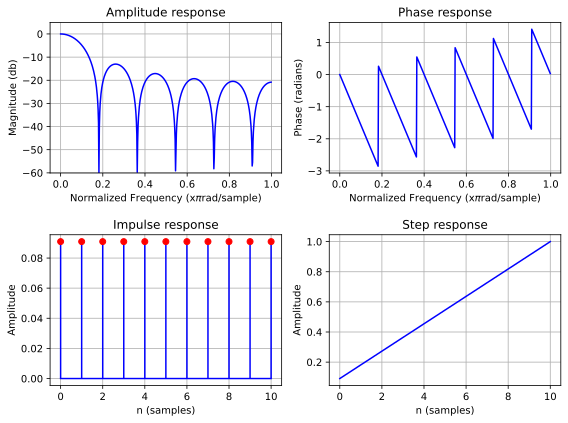

In [35]:
b = np.repeat(1.0/11, 11)
plot_filterz(b)

## Median filter

The median filter is similar to moving average, but is uses the moving median instead of average. It is nonlinear filter so you can’t calculate its step or amplitude response. Median filter can be used to suppress heavy non-Gaussian noise in time domain signals e.g. randomly occurring high peaks.

`scipy.signal.medfilt` in Python.

A comparison of median filter and moving average filter is shown in Figure 2.

### Example: Comparing moving average and median filter

Let’s see how moving average filters with different order and median filter can handle a noisy ramp signal. We’ll first create a ramp signal with added gaussian noise:

In [36]:
ym = hstack([np.repeat(0, 100), np.repeat(10, 100), np.repeat(0, 100)])
noisy = ym+np.random.randn(300)

Then filter it with three diffent MA filters and a median filter and plot the results. The example also demonstrates matplotlib’s object oriented API and axis-sharing between subplots.

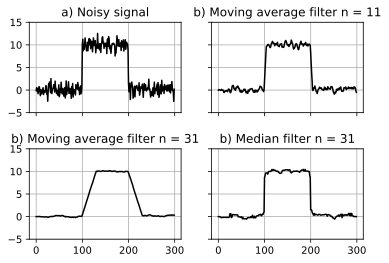

In [37]:
#Moving average filters
ym11 = ma(noisy)
ym31 = ma(noisy, 31)
#Median filter from scipy.signal
ymed11 = signal.medfilt(noisy, 11)

#Plots with shared x and y-axis
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,
                                           sharex=True, sharey=True)
ax1.plot(noisy, 'k')
ax1.set_title("a) Noisy signal")
ax1.set_ylim([-5, 15]);ax1.grid()
ax2.plot(ym11, 'k')
ax2.set_title("b) Moving average filter n = 11");ax2.grid()
ax3.plot(ym31, 'k')
ax3.set_title("b) Moving average filter n = 31");ax3.grid()
ax4.plot(ymed11, 'k')
ax4.set_title("b) Median filter n = 31");ax4.grid()
subplots_adjust(hspace=0.4)

## FIR filters

- FIR filters have finite impulse response.
- Convolution used to compute the filtered signal.
- Only the measured signal is used in the calculation.
- You can get excellent frequency domain performance with FIR filters.
- Overshoot in step response and ripple in stopband.
- Commonly used filters: Blackmann, Hamming.
- The computation is slow in comparison to IIR filters.

### FIR filters with SciPy
Design 100th order lowpass filter using hamming window, b is the impulse response filter stopband is set to 0.2 which equals $0.2*0.5*$samplerate.

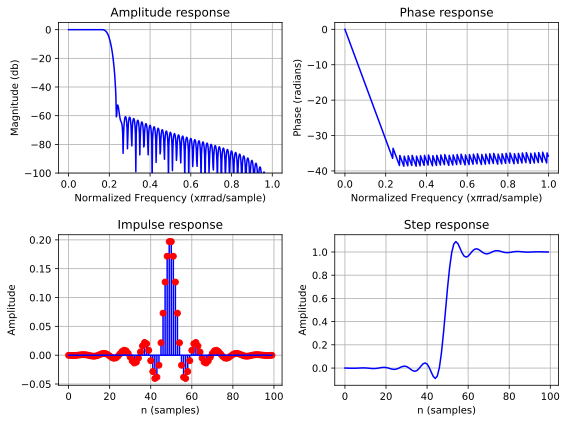

In [43]:
n = 100
#Design filter
b = signal.firwin(n, cutoff = 0.2, window = "hamming")
#Plot properties
plot_filterz(b)

<center><b> Figure 4 : Properties 100th order Hamming-window lowpass filter.</b></center>

Figure 4 shows the time and frequency domain properties of 100th order Hamming lowpass filter. The amplitude response has sharp roll off and the phase is linear in the passband. There is mild overshoot in the step response. The roll off can be made almost arbitrarily sharp using even higher orders. If you need to filter frequency specific noise from a time domain signal a linear phase FIR filter is a good choice.

### Use the filter and plot results.

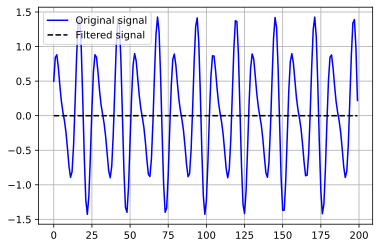

In [49]:
x = sin(linspace(0, 500, 1024)) + 0.5*cos(linspace(0, 750, 1024))
+ randn(1,1024)*0.2 + 0.2*cos(linspace(0, 10000, 1024));
xfiltered = signal.lfilter(b, 1, x)
plot(x[:200],'b', label = "Original signal")
plot(xfiltered[:200], "--k", label = "Filtered signal");grid()
legend()

### IIR filters

- IIR filters have infinite impulse response.
- Recursion is used to compute the filtered signal.
- They can also be used to design filters with frequency domain properties.
- Overshoot in step response and ripple in passband.
- Measured and previous filtered values are be used in the calculation.
- Commonly used filters: Butterworth, Chebyshev, Elliptic.
- The computation is very fast.
- You can get zero phase response by using a IIR filter forward and backward

Figure 5 shows the properties of 12th order Chebyshev II lowpass filter. The roll of is not as sharp as for the FIR filter in Figure 4 and there is more overshoot in the step response. The filter however has only 12 coefficients instead of 100 of the FIR filter making it considerably more efficient computationally.

The properties of 12th order Butterworth filter (which less aggressive IIR filter) are shown in Figure 6 . It has smooth roll of and doesn’t overshoot as much making it a better candidate for time domain applications.

## IIR filters with SciPy
The list IIR filters that can be designed with SciPy can be found from scipy.signal documentation. Here are a few examples:

Design 12th order chebyshev lowpass filter with stopband attenuation of 80dB filter stopband is set to 0.2 which means $0.2*0.5* $samplerate ( Figure 5 ).

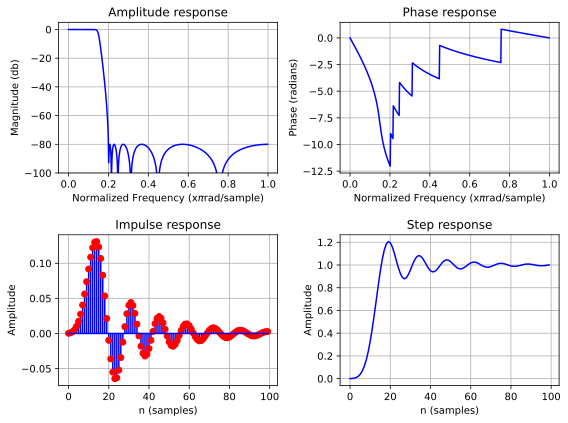

In [50]:
from scipy import signal
[b, a] = signal.cheby2(12, 80, 0.2)
plot_filterz(b,a)

<center><b> Figure 5 : Properties 12th order Chebyshev II lowpass filter </b></center>

Design 12th order lowpass butterworth filter with stopband at 0.2 in Figure 6 .

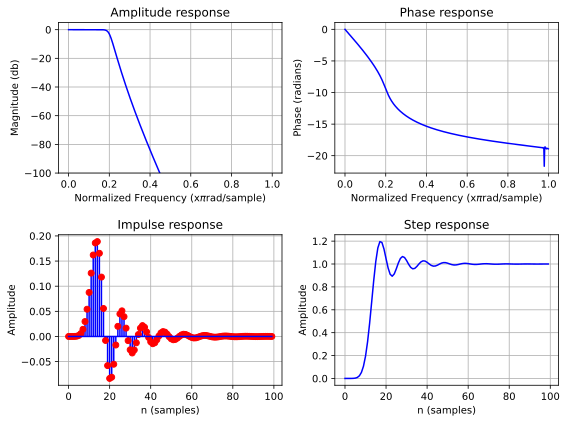

In [51]:
[b, a] = signal.butter(12, 0.2);
plot_filterz(b, a)

<center><b> Figure 6 : Filter properties for a 12th order lowpass butterworth filter </b></center>

The above commands are similar to the ones found from MATLAB, there is also another option: iirdesign command. Some examples.

**Let’s define 2 filters and plot their amplitude response: Elliptic bandpass filter and chebyshev I highpass filter. Parameter wp defines the pass band and ws defines the stop band.**

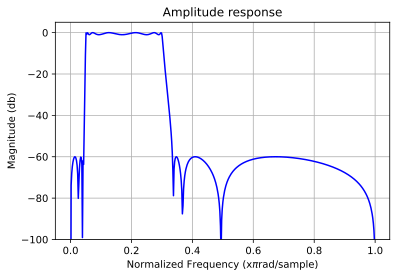

In [52]:
be, ae = signal.iirdesign(wp = [0.05, 0.3], ws= [0.02, 0.35],
                       gstop= 60, gpass=1, ftype='ellip')
plot_freqz(be,ae);plt.grid()

<center><b> Figure 7 : Elliptic bandpass filter </b></center>

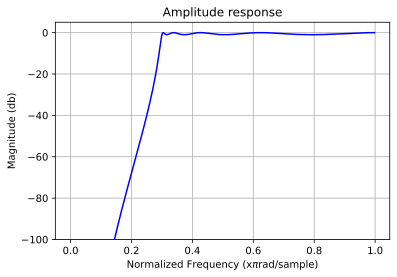

In [53]:
bb, ab = signal.iirdesign(wp = 0.3, ws= 0.2,
                       gstop= 60, gpass=1, ftype='cheby1')
plot_freqz(bb,ab);plt.grid()

<center><b> Figure 8 : Chebyshev I high pass filter </b></center>

### Filtering example
Here is an example of using different filters on signal Figure 9(a). We can see that the signal is contaminated with noise, but we don’t know if it is white noise or if it has a specific frequency.

![xshort.png](xshort.png)
<center><b> Figure 9 : Signals in time domain </b></center>

We start the analysis by plotting the periodogram of the signal ( Figure 10(a)). It reveals that there is high frequency noise at around 0.9. (The unit is relative to $0.5*$sampling rate, 0.9 becomes $0.9*0.5*$sample rate in actual units) and the interesting frequencies are clearly below 0.4. This means we can use a lowpass filter with stopband at 0.4 to remove the noise.

Figures 9 and 10 show the effect of using 100th order FIR hamming filter to the time domain signal and the PSD. Also the effect of 5 point moving average filter is shown for reference. The FIR filter is clearly the right choice for this signal, it preserves the time domain features nicely ( Beware of small phase shift for time critical applications ) and completely eliminates the high frequency noise. The moving average fails to remove the high frequency noise, but “cuts” the peaks from decreasing the amplitude.

![spectra.png](spectra.png)
<center><b> Figure 10 : Signals in frequency domain </b></center>

### Modifying sample rate

The sampling rate of a digital signal can be changed computationally. There are two basic operations:

**Decimation** is used to lower to sample rate. The operation uses an antialising filter to make sure there aren’t too high frequency components in the downsampled signal. signal.decimate in SciPy.

**Interpolation** Increases the sampling rate of the signal It is mainly used for digital to analog conversion to get more continuous results for e.g. audio.

**NOTE: Interpolation doesn’t fix too low sample rate.**

###  Detrending

Detrending means removing the slowly changing trends from a higher frequency signal. It is required for spectral analysis and can also be used to remove the effect of sensor drift from time domain measurements.

**Some methods for detrending are:**

- Subtracting the moving average or moving median from the signal.
- Fitting a polynomial model to the data and working with residuals.
- Using a highpass filter.

###  Exercises

1. When would you use a moving average filter?
2. What are the advantages of IIR filters over FIR filters and vice versa?
3. How can you check if the noise in a signal is random noise?

## Reference :
1. Matti Pastell, "[PyAgEng](http://pyageng.mpastell.com/book/index.html)", 2016.